# Student Name: Huynh Truong Tu
 Below is my assignment for Sprint18's "Dataset Creation"

--------------------------------------------------------------------------------------------------------------------------------------

# Introduction
We will create our own dataset and expand the data.



In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import re

# Init dataset

In [32]:
import glob 

path = './training' 
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['./training\\cat0.jpg',
 './training\\cat1.jpg',
 './training\\cat2.jpg',
 './training\\cat3.jpg',
 './training\\cat4.jpg',
 './training\\dog0.jpg',
 './training\\dog1.jpg',
 './training\\dog2.jpg',
 './training\\dog3.jpg',
 './training\\dog4.jpg']

# Prep dataset

In [33]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))
train_labels = []

for img in img_list:
    if re.search('dog', img):
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        dog_img_.close()
        train_labels.append(1)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        cat_img_.close()
        train_labels.append(0)
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

train_labels = np.array(train_labels)

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


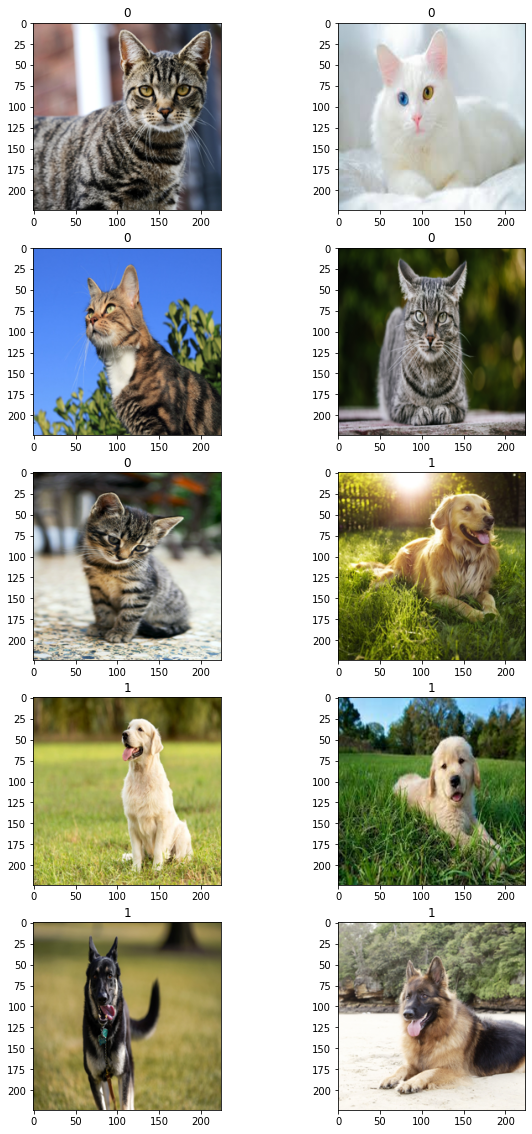

In [34]:
fig = plt.figure(figsize=(10,20))
columns = 2
rows = 5
for i, img in enumerate(np.concatenate((cat_img_array,dog_img_array), axis = 0)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title(train_labels[i])
    plt.imshow(img)
plt.show()

In [35]:
train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)
train_labels

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_17432/2341822611.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [36]:
train_images = np.concatenate((cat_img_array,dog_img_array), axis = 0)
train_images.shape

(10, 224, 224, 3)

In [37]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)

# Problem 1 - Learning classification with self-made dataset

In [38]:
import tensorflow as tf

tf.random.set_seed(3)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=cat_img_array.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 285ms/step - loss: 2.1971 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 50ms/step - loss: 9.6810 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 145.8613 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 137.2234 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 58.0480 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 55ms/step - loss: 23.5530 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 53ms/step - loss: 51.8662 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 52ms/step - loss: 19.0640 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 52ms/step - loss: 3.9387 - accuracy: 0.8750
Epoch 10/10
1/1 [==============================] - 0s 53ms/step - loss: 24.6624 - accuracy: 0.7500


### Probability model


In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
class_names = ['Cat', 'Dog']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Train result

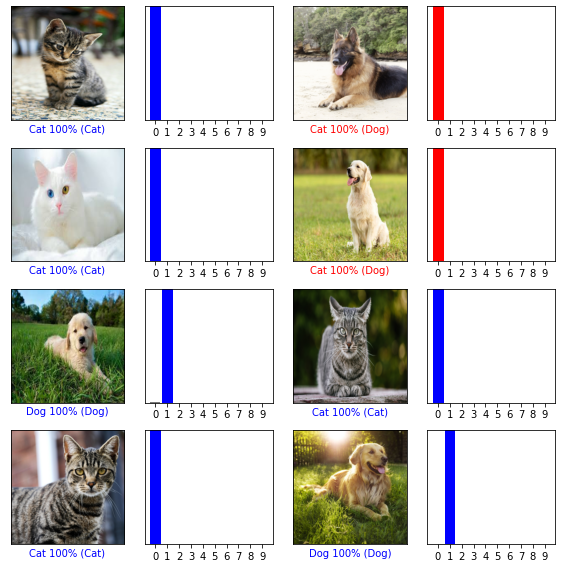

In [43]:
predictions = probability_model.predict(train_images)
num_rows = int(train_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], train_labels, train_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], train_labels)
plt.tight_layout()
plt.show()

### Test result

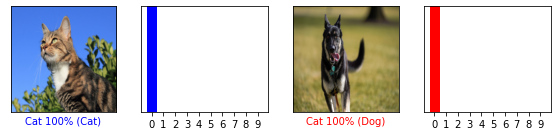

In [44]:
predictions = probability_model.predict(test_images)
num_rows = int(test_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
- Current result is pretty bad

# Problem 2 - Data expansion for classification dataset

In [45]:
import cv2

def plot(img):
  print('shape: ', img.shape)
  plt.imshow(img)
  plt.show()

## Some possible transformations

shape:  (1333, 1000, 3)


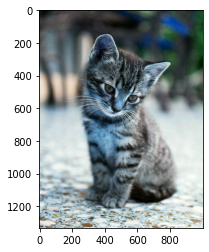

In [46]:
# sample image
img = cv2.imread(img_list[4])
plot(img)

### Resize

shape:  (1333, 2000, 3)


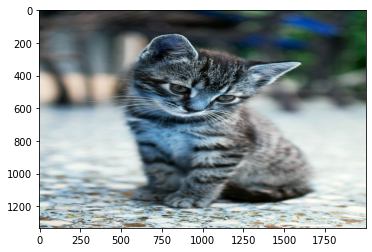

In [47]:
def resize(img, ratio = (2,1)):
  fx,fy = ratio
  img = cv2.resize(img, None, fx = fx, fy = fy)
  return img

plot(resize(img))


shape:  (1333, 1000, 3)


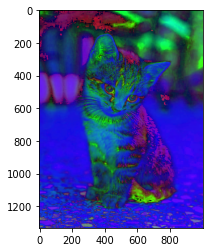

In [48]:
def hsv_color(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
plot(hsv_color(img))

shape:  (1333, 1000, 3)


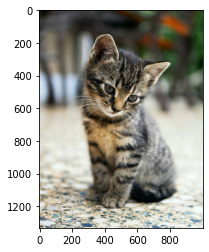

In [49]:
def rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot(rgb(img))

### Rotation

shape:  (1000, 1333, 3)


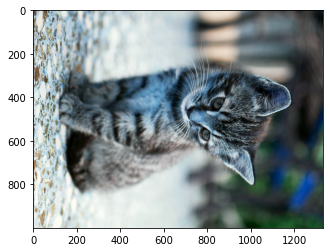

shape:  (1333, 1000, 3)


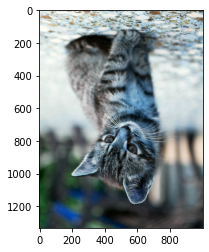

shape:  (1000, 1333, 3)


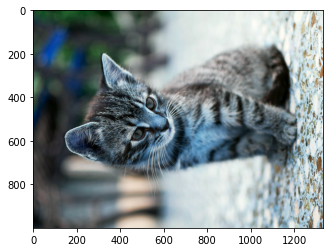

In [50]:
def rotate90(img):
  return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
def rotate180(img):
  return cv2.rotate(img, cv2.ROTATE_180)
def rotate270(img):
  return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)


plot(rotate90(img))
plot(rotate180(img))
plot(rotate270(img))

In [51]:
def same(img):
  return img

## Let's run these basic transformation
And put them into a `train1` folder

In [52]:
!del /q .\train1\*

In [53]:
from functools import partial

resizes = [partial(resize, ratio = ratio) for ratio in [(2,1), (1,2), (0.5,0.5), (2,2)]]
color_changes = [hsv_color, rgb]
rotates = [rotate90, rotate180, rotate270, same]
transformations = resizes + color_changes + rotates

output_path = './train1/'

for i, origin_img_path in enumerate(img_list):
  label = 'cat' if re.search('cat', origin_img_path) else 'dog'
  img = cv2.imread(origin_img_path)
  for j,transformation in enumerate(transformations):
    trans_img = transformation(img)
    cv2.imwrite(output_path + label + str(i) + str(j) + '.jpeg', trans_img)


## Train with new data

In [54]:
import glob 

path = './train1' 
img_list = glob.glob(path + '/*' + ".jpeg")

In [55]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))
train_labels = []

for img in img_list:
    if re.search('dog', img):
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        dog_img_.close()
        train_labels.append(1)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        cat_img_.close()
        train_labels.append(0)
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

train_labels = np.array(train_labels)

dog_image:(50, 224, 224, 3)  cat_image:(50, 224, 224, 3)


In [56]:
train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)
train_images = np.concatenate((cat_img_array,dog_img_array), axis = 0)
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)
print([x.shape for x in [train_images,test_images, train_labels,test_labels]])

[(80, 224, 224, 3), (20, 224, 224, 3), (80,), (20,)]


C:\Users\ADMIN\AppData\Local\Temp/ipykernel_17432/4134254003.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)


In [57]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 58ms/step - loss: 29.2746 - accuracy: 0.6750
Epoch 2/10
3/3 [==============================] - 0s 70ms/step - loss: 18.2826 - accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 0s 58ms/step - loss: 5.2119 - accuracy: 0.8875
Epoch 4/10
3/3 [==============================] - 0s 66ms/step - loss: 3.8418 - accuracy: 0.8750
Epoch 5/10
3/3 [==============================] - 0s 63ms/step - loss: 2.9516 - accuracy: 0.8875
Epoch 6/10
3/3 [==============================] - 0s 68ms/step - loss: 1.6453 - accuracy: 0.9125
Epoch 7/10
3/3 [==============================] - 0s 66ms/step - loss: 1.5147 - accuracy: 0.9125
Epoch 8/10
3/3 [==============================] - 0s 67ms/step - loss: 0.5609 - accuracy: 0.9750
Epoch 9/10
3/3 [==============================] - 0s 66ms/step - loss: 0.4043 - accuracy: 0.9750
Epoch 10/10
3/3 [==============================] - 0s 66ms/step - loss: 0.4603 - accuracy: 0.9500


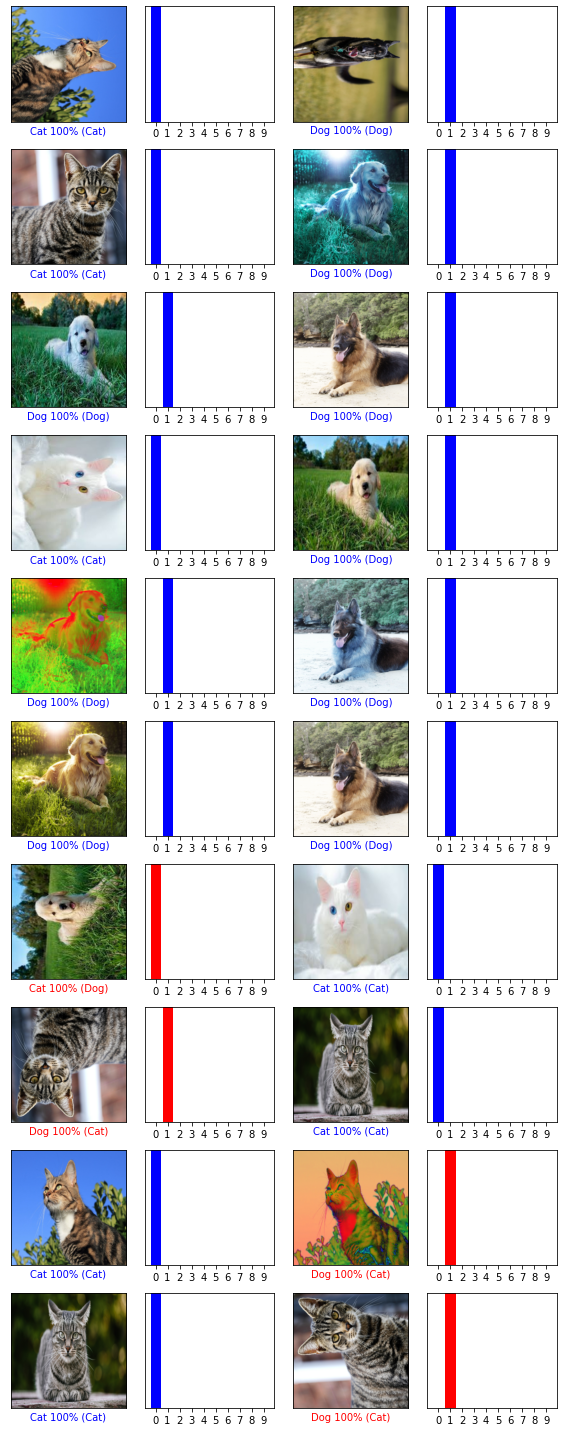

In [58]:

### Test result
predictions = probability_model.predict(test_images)
num_rows = int(test_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
There are small improvements. Training is better.

# Problem 3 + 4
- Preparation of object detection dataset
- Data expansion for object detection dataset

### Description
Here, i will go through [https://albumentations.ai/docs/examples/example_bboxes/](https://albumentations.ai/docs/examples/example_bboxes/)

**So that we can see the use of bounding box plus image annotation with Albumentation**

In [59]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [60]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [61]:
image = cv2.imread('image/album_example.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [62]:
bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}

### Original

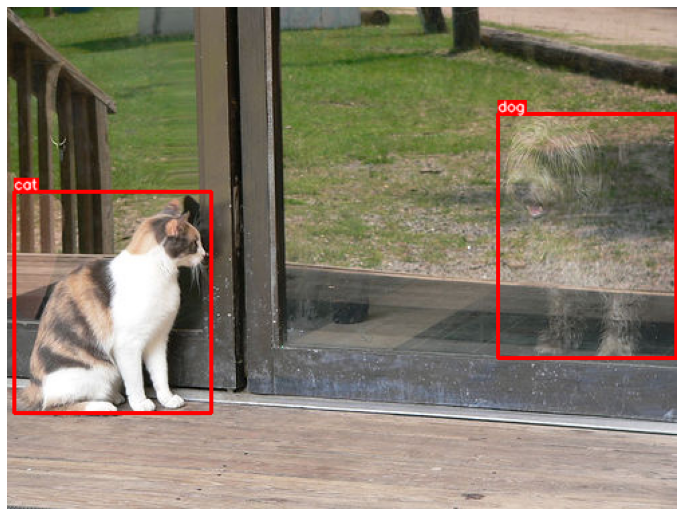

In [63]:
visualize(image, bboxes, category_ids, category_id_to_name)


### Horizontal flip

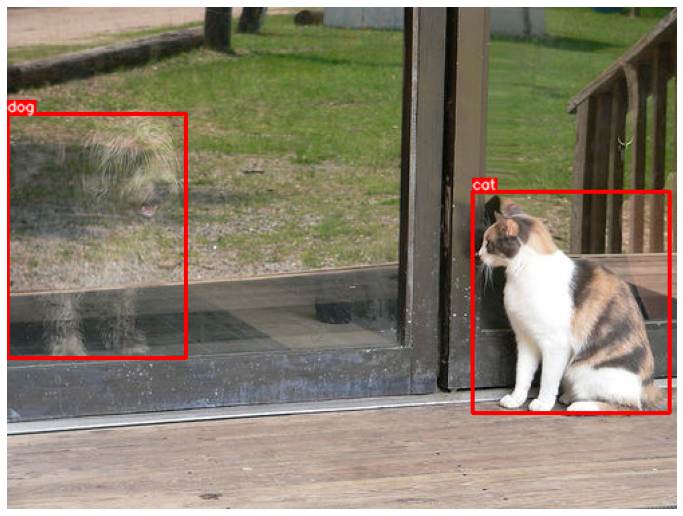

In [64]:
import random

transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

### Zoom

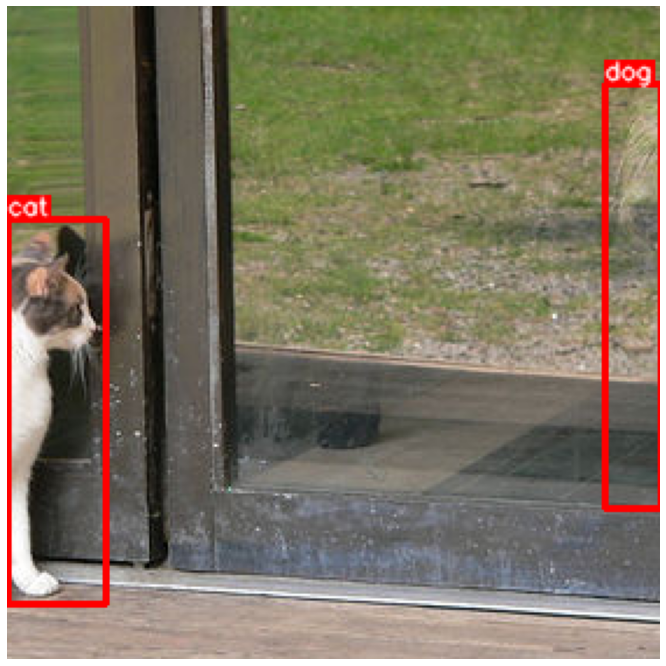

In [65]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

### Zoom but dog is now out of frame

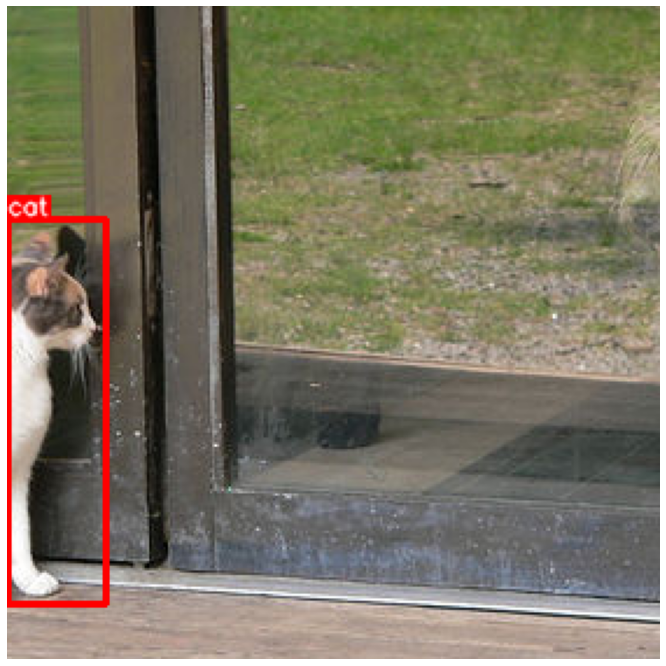

In [66]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', min_area=4500, label_fields=['category_ids']),
)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

-----------------------------------------------------------------------------------------------------------------------------------------------

This is the end of my assignment. Thank you for reading!